In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\ethan\Downloads\titanic_dataset  (1).csv")

In [3]:
data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Splitting names according to salutation and applying mean value to each salutation category to prevent children from assigning an ubnormal age value. 

In [5]:
data['salutation'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs


In [6]:
temp = pd.concat([data.Age, data.salutation], axis = 1)

In [7]:
Mr = data[data['salutation'] == 'Mr']
Miss = data[data['salutation'] == 'Miss']
Master = data[data['salutation'] == 'Master'] 
Dr = data[data['salutation'] == 'Dr']
Sir = data[data['salutation'] == 'Sir']
Mrs = data[data['salutation'] == 'Mrs']

In [8]:
Mr['Age'] = Mr['Age'].fillna(Mr['Age'].mean())
data.update(Mr)


Miss['Age'] = Miss['Age'].fillna(Miss['Age'].mean())
data.update(Miss)


Master['Age'] = Master['Age'].fillna(Master['Age'].mean())
data.update(Master)


Dr['Age'] = Dr['Age'].fillna(Dr['Age'].mean())
data.update(Dr)


Mrs['Age'] = Mrs['Age'].fillna(Mrs['Age'].mean())
data.update(Mrs)

In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
salutation       0
dtype: int64

In [10]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
data['Cabin'] = data['Cabin'].fillna('U')

In [12]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
salutation     0
dtype: int64

In [13]:
data = data.drop(['salutation', 'Cabin', 'Ticket', 'Name','PassengerId'], axis = 1)

## Performing Encoding

In [14]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [16]:
data.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1,22.0,1.0,0.0,7.2500,S
1,1.0,1.0,0,38.0,1.0,0.0,71.2833,C
2,1.0,3.0,0,26.0,0.0,0.0,7.9250,S
3,1.0,1.0,0,35.0,1.0,0.0,53.1000,S


In [17]:
data = pd.get_dummies(data, drop_first= True)

In [18]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.0,3.0,1,22.0,1.0,0.0,7.2500,0,1
1,1.0,1.0,0,38.0,1.0,0.0,71.2833,0,0
2,1.0,3.0,0,26.0,0.0,0.0,7.9250,0,1


<Axes: xlabel='Fare', ylabel='Density'>

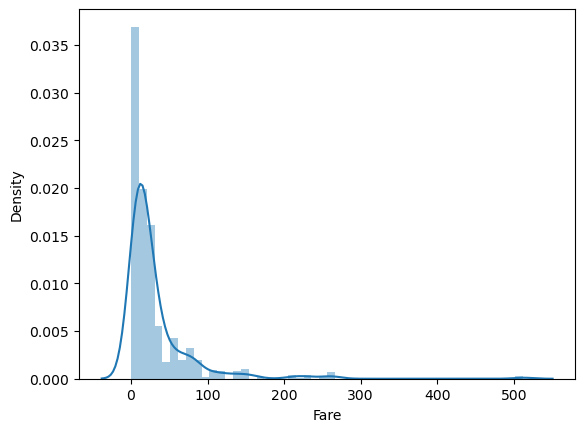

In [19]:
sns.distplot(data.Fare)

In [20]:
data['Fare'] = np.log(data['Fare'].replace(0, 0.1))

<Axes: xlabel='Fare', ylabel='Density'>

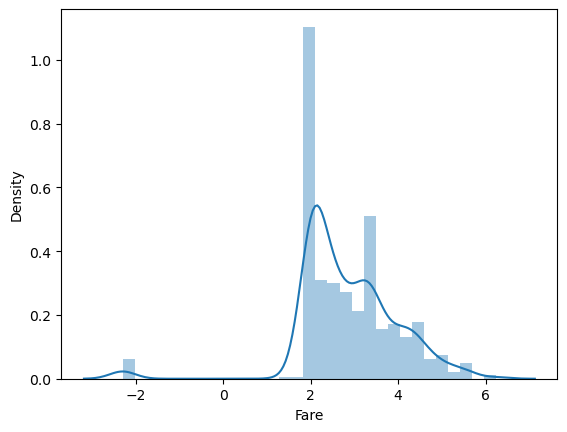

In [21]:
sns.distplot(data['Fare'])

In [22]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.0,3.0,1,22.0,1.0,0.0,1.981001,0,1
1,1.0,1.0,0,38.0,1.0,0.0,4.266662,0,0
2,1.0,3.0,0,26.0,0.0,0.0,2.070022,0,1


### Performing Train Test Split

In [23]:
inde = data.drop('Survived', axis = 1)
dep= data['Survived']

In [24]:
from sklearn.model_selection import train_test_split
inde_train, inde_test, dep_train, dep_test = train_test_split(inde, dep, test_size=0.25, random_state=46)

#### k-NN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [26]:
knnAccMetrc = []
n = np.arange(3,20)

In [27]:
for k in n:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(inde_train, dep_train)
    knnPred = knn.predict(inde_test)
    acc = accuracy_score(dep_test, knnPred)
    knnAccMetrc.append(acc)

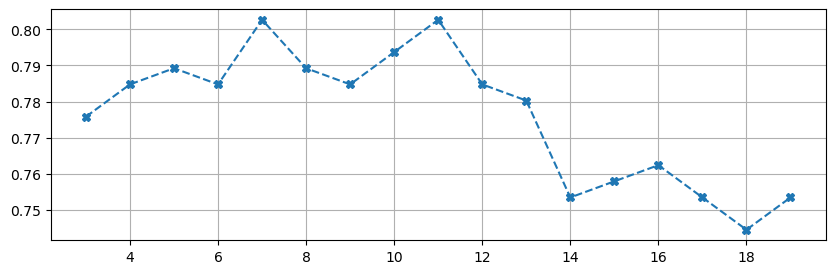

In [28]:
plt.figure(figsize=(10,3))
plt.plot(n,knnAccMetrc, 'X--')
plt.grid()

In [29]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(inde_train, dep_train)
knnPred = knn.predict(inde_test)
knnacc = accuracy_score(dep_test, knnPred)
knnacc

0.8026905829596412

<Axes: >

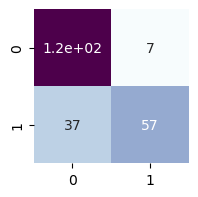

In [30]:
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(dep_test, knnPred), annot = True, cmap = 'BuPu', cbar = False)

In [31]:
print(metrics.classification_report(dep_test, knnPred))

              precision    recall  f1-score   support

         0.0       0.77      0.95      0.85       129
         1.0       0.89      0.61      0.72        94

    accuracy                           0.80       223
   macro avg       0.83      0.78      0.78       223
weighted avg       0.82      0.80      0.79       223



### Performing SVM

In [32]:
from sklearn.svm import SVC
svmclf = SVC(kernel='linear')

In [33]:
svmclf.fit(inde_train, dep_train)
svmPred = svmclf.predict(inde_test)

In [34]:
svmacc = accuracy_score(dep_test, svmPred)

In [35]:
svmacc

0.8116591928251121

<Axes: >

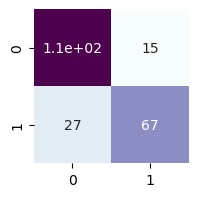

In [36]:
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(dep_test, svmPred), annot = True, cmap = 'BuPu', cbar = False)

In [37]:
print(metrics.classification_report(dep_test, svmPred))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       129
         1.0       0.82      0.71      0.76        94

    accuracy                           0.81       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



## Performing Cross-Vlaidation

#### Knn K-Fold

In [38]:
from sklearn.model_selection import KFold
kfldval = KFold(10)

In [39]:
from sklearn.model_selection import cross_val_score
knnScore = cross_val_score(knn, inde, dep, cv = kfldval)

In [40]:
knnScore

array([0.71111111, 0.79775281, 0.74157303, 0.79775281, 0.76404494,
       0.76404494, 0.78651685, 0.78651685, 0.82022472, 0.82022472])

In [41]:
knnCVScorekfld = np.mean(knnScore)

In [42]:
knnCVScorekfld

0.7789762796504369

### k-NN Strat 

In [43]:
from sklearn.model_selection import StratifiedKFold
knnskval = StratifiedKFold(n_splits=9)

In [44]:
StratScoreknn = cross_val_score(knn, inde, dep, cv = knnskval)
StratScoreknn

array([0.74747475, 0.74747475, 0.76767677, 0.82828283, 0.75757576,
       0.71717172, 0.82828283, 0.82828283, 0.7979798 ])

In [46]:
KnnStratScore = np.mean(StratScoreknn)

In [47]:
KnnStratScore

0.7800224466891135

### SVM Kfold

In [48]:
from sklearn.model_selection import KFold
kfldvalSVM = KFold(9)

In [56]:
from sklearn.model_selection import cross_val_score
SVMkfoldScore = cross_val_score(svmclf, inde, dep, cv = kfldvalSVM)

In [57]:
SVMkfoldScore

array([0.81818182, 0.80808081, 0.75757576, 0.85858586, 0.75757576,
       0.74747475, 0.73737374, 0.82828283, 0.76767677])

In [58]:
SVMkfoldScore = np.mean(SVMkfoldScore)

In [59]:
SVMkfoldScore

0.7867564534231201

#### SVM Strat

In [61]:
from sklearn.model_selection import StratifiedKFold
skval = StratifiedKFold(n_splits=9)

In [62]:
StratScore = cross_val_score(svmclf, inde, dep, cv = skval)
StratScore

array([0.81818182, 0.77777778, 0.76767677, 0.88888889, 0.75757576,
       0.75757576, 0.73737374, 0.80808081, 0.76767677])

In [65]:
SVMStratScore = np.mean(StratScore)

In [67]:
SVMStratScore

0.7867564534231201

In [68]:
accuracyDF = {'k-NN Hold Out':knnacc, 'knn Kfold':knnCVScorekfld,'knn Strat': KnnStratScore, 'SVM Hold Out':svmacc, 'SVM Kfold':SVMkfoldScore, 'SVM Strat':SVMStratScore }

In [71]:
accuracyDF = pd.Series(accuracyDF)

In [73]:
accuracyDF = pd.DataFrame(accuracyDF)

In [75]:
accuracyDF.columns = ['Accuracy Values']

---

In [76]:
accuracyDF

,Accuracy Values
k-NN Hold Out,0.802691
knn Kfold,0.778976
knn Strat,0.780022
SVM Hold Out,0.811659
SVM Kfold,0.786756
SVM Strat,0.786756


---